In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import metrics

In [2]:
data=pd.read_csv('train_Logistic.csv')

In [3]:
data=data.drop(['Name'],axis=1)

In [4]:
data

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
572,0,3,male,19.0,0,0,14.5000
573,1,2,female,34.0,0,0,13.0000
574,1,1,female,39.0,1,0,55.9000
575,0,3,female,18.0,1,0,14.4583


In [5]:
x_train=np.array(data.iloc[:,1:7])
y_train=np.array(data.iloc[:,:1])

In [6]:
for i in range(577):
    if x_train[i,1]=='male':
        x_train[i,1]=1
    if x_train[i,1]=='female':
        x_train[i,1]=0

In [7]:
#x_train=(x_train-x_train.mean())/x_train.std()
x_train=x_train/np.max(x_train)

In [8]:
x_train

array([[0.005855610025741261, 0.0019518700085804205, 0.04294114018876925,
        0.0019518700085804205, 0.0, 0.014151057562208049],
       [0.0019518700085804205, 0.0, 0.07417106032605598,
        0.0019518700085804205, 0.0, 0.13913573538264068],
       [0.005855610025741261, 0.0, 0.050748620223090936, 0.0, 0.0,
        0.015468569817999833],
       ...,
       [0.0019518700085804205, 0.0, 0.0761229303346364,
        0.0019518700085804205, 0.0, 0.1091095334796455],
       [0.005855610025741261, 0.0, 0.03513366015444757,
        0.0019518700085804205, 0.0, 0.028220722145058292],
       [0.005855610025741261, 0.0019518700085804205, 0.06245984027457346,
        0.0, 0.0, 0.015468569817999833]], dtype=object)

In [9]:
w=np.zeros(6)
b=0
alpha=5*10**-3

In [10]:
def sigmoid(w,x,b):
    e=math.e
    g=np.dot(x, w)+b
    a=1+(e**((-1)*g))
    return 1/a

In [11]:
def log(a):
    return np.log(a + 0.0001)

In [12]:
def CostFunc(w,x,y,b):
    c=0
    #print(x)
    for i in range(len(x)):
        #print(x[i])
        #print(sigmoid(w,x[i],b))
        c=c+((-1)*y[i]*log(sigmoid(w,x[i],b)))+((-1)*(y[i]-1)*log(1-sigmoid(w,x[i],b)))
    c=(-1)*c/len(x)
    return c

In [13]:
def Gradient(x,y,w,b):
    m=len(x)
    n=len(x[0])
    dj_dw=np.zeros(6)
    dj_db=0
    for i in range(m):
        er=(sigmoid(w,x[i],b)-y[i])
        for j in range(n):
            dj_dw[j] = dj_dw[j] + er * x[i, j]
        dj_db=dj_db+er
    w=w-dj_dw*(alpha)
    b=b-dj_db*(alpha)
    #print(b)
    return w,b

In [14]:
epochs=100
iterations=[]
costs = []
for i in range(epochs):
    w,b=Gradient(x_train,y_train,w,b)
    costs.append(CostFunc(w,x_train,y_train,b))
    iterations.append(i)

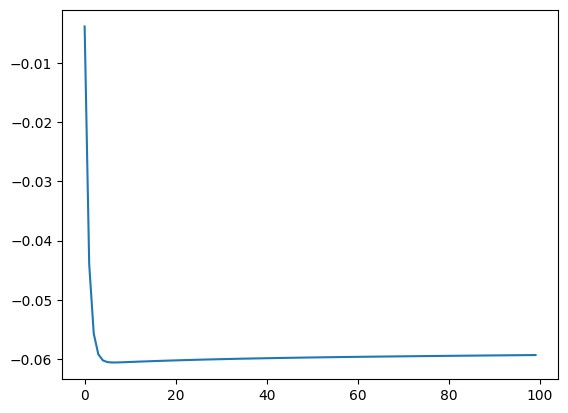

In [15]:
plt.plot(iterations,costs)
plt.show()

In [16]:
t = np.array(sigmoid(w, x_train, b) >= 0.5, dtype=np.intp)

In [17]:
sum(t == y_train.T[0])/y_train.shape[0]

0.6031195840554593

In [18]:
w, b

(array([-0.05980366, -0.07360106, -0.30291932, -0.0192382 ,  0.01446932,
         1.89330412]),
 array([-0.5191045]))

In [19]:
t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [20]:
test=pd.read_csv('test_Logistic.csv')

In [21]:
test=test.drop(['Name'],axis=1)
x_test=np.array(test.iloc[:,1:7])
y_test=np.array(test.iloc[:,:1])

In [22]:
for i in range(310):
    if x_test[i,1]=='male':
        x_test[i,1]=1
    if x_test[i,1]=='female':
        x_test[i,1]=0

In [23]:
x_test=((x_test-x_test.mean()))/x_test.std()

In [24]:
x_test

array([[-0.33409588539222074, -0.4075653718674399, 0.5108032090728001,
        -0.37083062862983035, -0.37083062862983035, 0.694476925260848],
       [-0.37083062862983035, -0.4075653718674399, 1.0250896143993344,
        -0.37083062862983035, -0.37083062862983035, 3.6657041829713966],
       [-0.33409588539222074, -0.37083062862983035, 1.5761107629634785,
        -0.4075653718674399, -0.4075653718674399, 0.5475379523104096],
       ...,
       [-0.2973611421546111, -0.4075653718674399, -0.15042216920417273,
        -0.37083062862983035, -0.33409588539222074, 0.4538643570545051],
       [-0.37083062862983035, -0.37083062862983035, 0.5475379523104096,
        -0.4075653718674399, -0.4075653718674399, 0.694476925260848],
       [-0.2973611421546111, -0.37083062862983035, 0.7679464117360673,
        -0.4075653718674399, -0.4075653718674399, -0.12287111177596553]],
      dtype=object)

In [25]:
y_predict = np.array(sigmoid(w, x_test, b) >= 0.5, dtype=np.intp)

In [26]:
y_predict

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,

In [27]:
sum(y_predict == y_test.T[0])/310

0.7032258064516129

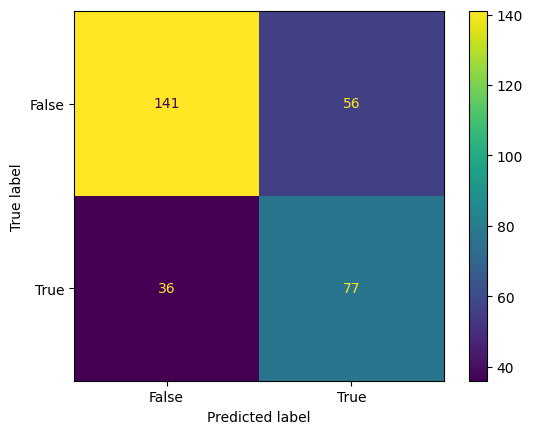

In [29]:
confusion_matrix = metrics.confusion_matrix(y_test,y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
Accuracy=metrics.accuracy_score(y_test,y_predict)

In [30]:
Accuracy

0.7032258064516129